In [2]:
#mes bibliothèques utiles
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from PIL import Image, ImageDraw

In [3]:
df = pd.read_csv('result-vote.csv',sep=';',encoding='latin1',dtype={'Code du département':str})  #lire le fichier
df.head() #afficher les 5 premières lignes

/tmp/ipykernel_287/1407388213.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('result-vote.csv',sep=';',encoding='latin1',dtype={'Code du département':str})  #lire le fichier


,Code du département,Libell du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Voix.10,% Voix/Ins.10,% Voix/Exp.10,N Panneau.11,Sexe.11,Nom.11,Pr nom.11,Voix.11,% Voix/Ins.11,% Voix/Exp.11
0,1,Ain,4,4 me circonscription,1,L'Abergement-Cl menciat,1,645,108,"16,74",...,3,"0,47","0,58",12,M,DUPONT-AIGNAN,Nicolas,21,"3,26","4,04"
1,1,Ain,5,5 me circonscription,2,L'Abergement-de-Varey,1,213,38,"17,84",...,3,"1,41","1,75",12,M,DUPONT-AIGNAN,Nicolas,0,0,0
2,1,Ain,5,5 me circonscription,4,Amb rieu-en-Bugey,1,1129,266,"23,56",...,8,"0,71","0,95",12,M,DUPONT-AIGNAN,Nicolas,13,"1,15","1,55"
3,1,Ain,5,5 me circonscription,4,Amb rieu-en-Bugey,2,1128,265,"23,49",...,4,"0,35","0,48",12,M,DUPONT-AIGNAN,Nicolas,20,"1,77","2,38"
4,1,Ain,5,5 me circonscription,4,Amb rieu-en-Bugey,3,1213,246,"20,28",...,3,"0,25","0,32",12,M,DUPONT-AIGNAN,Nicolas,19,"1,57",2


In [4]:
print(df.columns.values)   #afficher les noms de toutes les colonnes utile pour mieux savoir les utiliser

['Code du département' 'Libell  du département'
 'Code de la circonscription' 'Libellé de la circonscription'
 'Code de la commune' 'Libellé de la commune' 'Code du b.vote' 'Inscrits'
 'Abstentions' '% Abs/Ins' 'Votants' '% Vot/Ins' 'Blancs' '% Blancs/Ins'
 '% Blancs/Vot' 'Nuls' '% Nuls/Ins' '% Nuls/Vot' 'Exprim s' '% Exp/Ins'
 '% Exp/Vot' 'N Panneau' 'Sexe' 'Nom' 'Pr nom' 'Voix' '% Voix/Ins'
 '% Voix/Exp' 'N Panneau.1' 'Sexe.1' 'Nom.1' 'Pr nom.1' 'Voix.1'
 '% Voix/Ins.1' '% Voix/Exp.1' 'N Panneau.2' 'Sexe.2' 'Nom.2' 'Pr nom.2'
 'Voix.2' '% Voix/Ins.2' '% Voix/Exp.2' 'N Panneau.3' 'Sexe.3' 'Nom.3'
 'Pr nom.3' 'Voix.3' '% Voix/Ins.3' '% Voix/Exp.3' 'N Panneau.4' 'Sexe.4'
 'Nom.4' 'Pr nom.4' 'Voix.4' '% Voix/Ins.4' '% Voix/Exp.4' 'N Panneau.5'
 'Sexe.5' 'Nom.5' 'Pr nom.5' 'Voix.5' '% Voix/Ins.5' '% Voix/Exp.5'
 'N Panneau.6' 'Sexe.6' 'Nom.6' 'Pr nom.6' 'Voix.6' '% Voix/Ins.6'
 '% Voix/Exp.6' 'N Panneau.7' 'Sexe.7' 'Nom.7' 'Pr nom.7' 'Voix.7'
 '% Voix/Ins.7' '% Voix/Exp.7' 'N Panneau.8' '

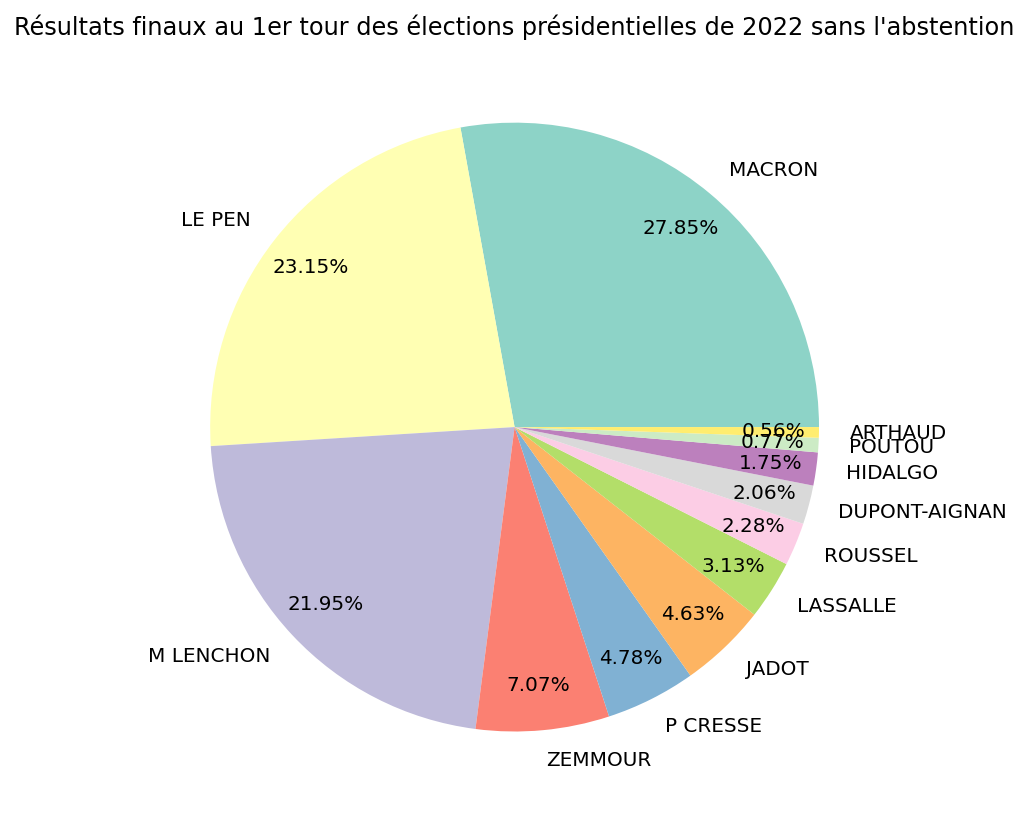

In [5]:
#STOCK LES VALEURS
#creer un dictio avec nom de la personne et son nombre de voix au total en France en faisant une somme des lignes
data={'Nom':[],'Voix':[]}
#pour la 1er qui a un nom de colonne différent des autres
data['Nom'].append(df['Nom'][0])  #ajout son nom
data['Voix'].append(df['Voix'].sum())  #ajout son nb de voix
for i in range(1,12):    #pour tous les autres qui on un nom du style Nom.i
    data['Nom'].append(df['Nom.'+str(i)][0])    #idem
    data['Voix'].append(df['Voix.'+str(i)].sum())   #idem

df2 = pd.DataFrame(data)  #transforme le dictio en dataframe



#PIE
df2=df2.sort_values('Voix',ascending=False)  #trier en ordre croissant pour que notre pie soit propre et lisible
palette = cm.Set3
plt.pie(df2['Voix'],labels=df2['Nom'],colors=palette.colors,autopct='%1.2f%%',pctdistance=0.85)
#colors = un nuancier de couleurs pâles, autopct = le format des nombres que l'on affiche (ici 2 chiffres après la virgule), pctdistance = le positionnement des nombres sur le pie
plt.title("Résultats finaux au 1er tour des élections présidentielles de 2022 sans l'abstention")
plt.show()  #permet d'avoir que le pie et pas le recap en plus



In [6]:
#Pour select juste les nom/prenom/nbvoix  => pas utiliser pour l'instant
#df[['Nom', 'Pr nom', 'Voix','Nom.1', 'Pr nom.1', 'Voix.1','Nom.2', 'Pr nom.2','Voix.2','Nom.3', 'Pr nom.3', 'Voix.3','Nom.4','Pr nom.4', 'Voix.4','Nom.5','Pr nom.5' ,'Voix.5','Nom.6', 'Pr nom.6', 'Voix.6','Nom.7','Pr nom.7', 'Voix.7','Nom.8','Pr nom.8' ,'Voix.8','Nom.9','Pr nom.9', 'Voix.9','Nom.10','Pr nom.10' ,'Voix.10','Nom.11','Pr nom.11' ,'Voix.11']]

#df.drop(['A'], axis=1)   #supprimer une colonne avec son nom

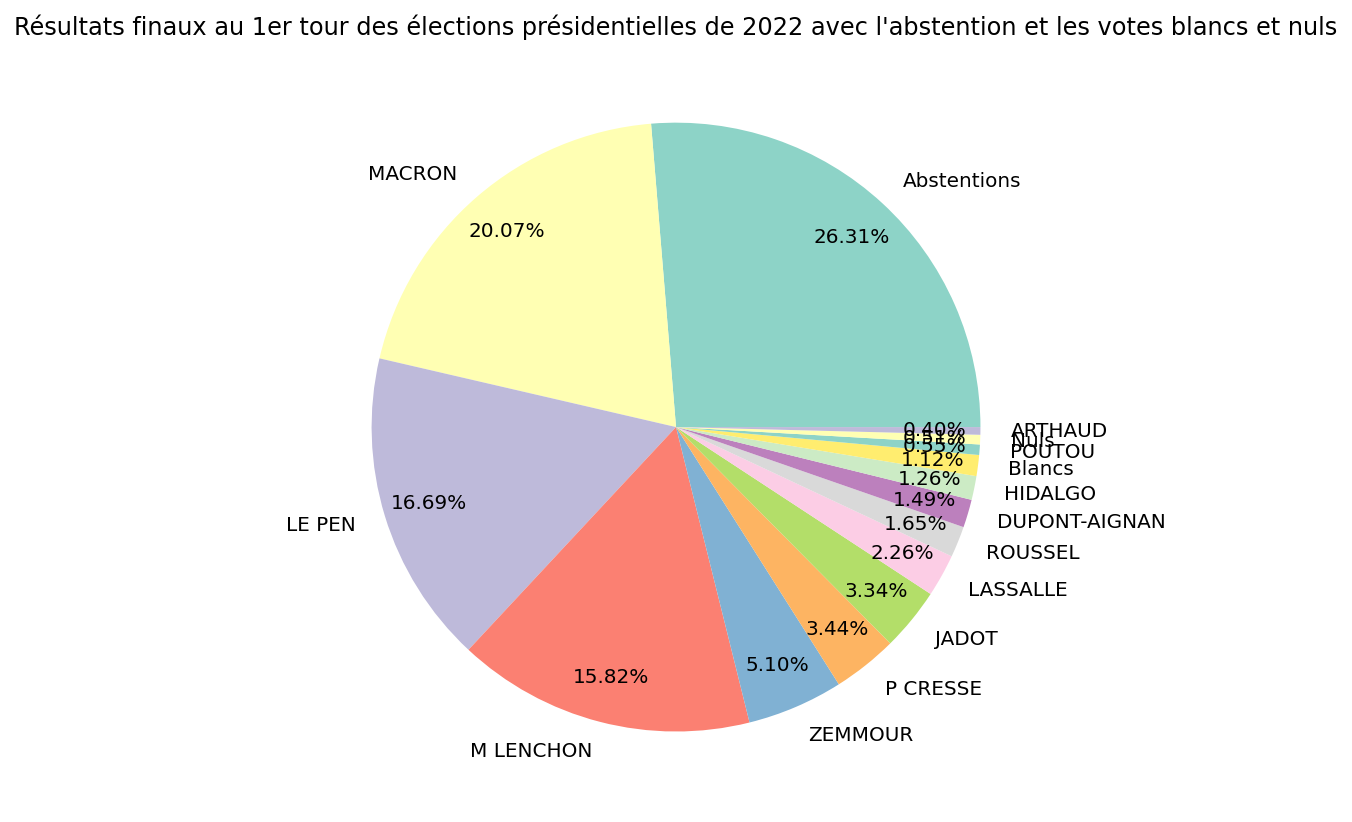

In [7]:
#Rajout dans df2 nuls/abst/blanc
df2.loc[len(df2)]={'Nom': 'Nuls','Voix':df['Nuls'].sum()}
df2.loc[len(df2)]={'Nom': 'Abstentions','Voix':df['Abstentions'].sum()}
df2.loc[len(df2)]={'Nom': 'Blancs','Voix':df['Blancs'].sum()}

#affiche pie idem avant
df2=df2.sort_values('Voix',ascending=False)
palette = cm.Set3
plt.pie(df2['Voix'],labels=df2['Nom'],colors=palette.colors,autopct='%1.2f%%',pctdistance=0.85)
plt.title("Résultats finaux au 1er tour des élections présidentielles de 2022 avec l'abstention et les votes blancs et nuls")
plt.show()



In [8]:
df2

,Nom,Voix
13,Abstentions,12824169
2,MACRON,9783058
4,LE PEN,8133828
6,M LENCHON,7712520
5,ZEMMOUR,2485226
9,P CRESSE,1679001
8,JADOT,1627853
3,LASSALLE,1101387
1,ROUSSEL,802422
11,DUPONT-AIGNAN,725176


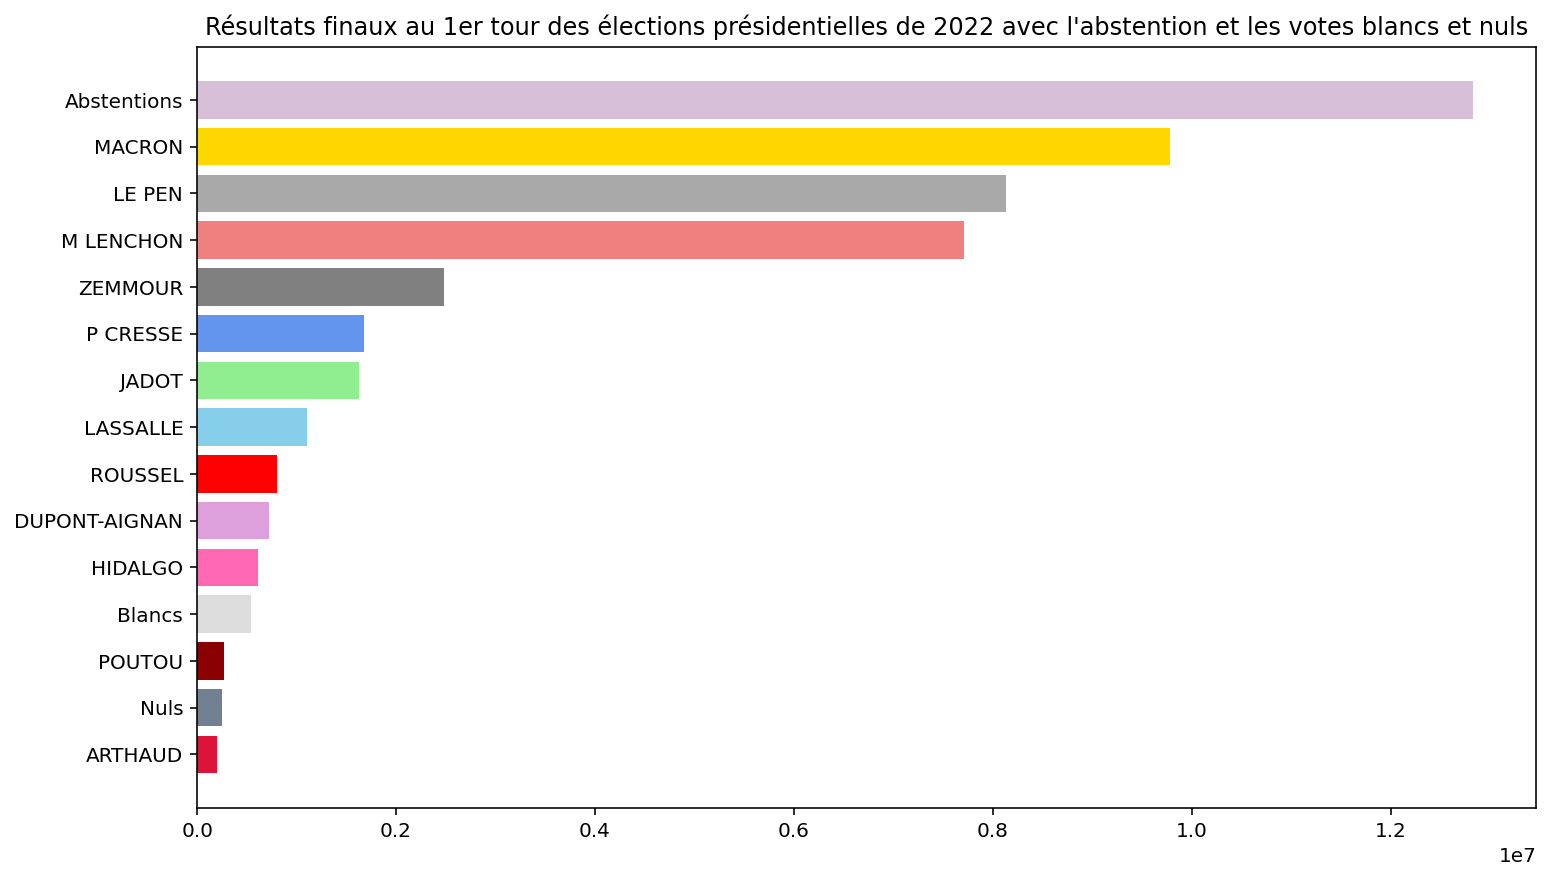

In [9]:
#la même chose en histogramme, inspiration du graph de https://www.challenges.fr/politique/presidentielle-2022-qui-peut-exercer-un-recours-a-l-election-presidentielle_810150
#les couleurs essayent de copier l'original

fig, ax = plt.subplots()
ax.barh(df2['Nom'],df2['Voix'],color=['thistle','gold','darkgray','lightcoral','gray','cornflowerblue','lightgreen','skyblue','red','plum','hotpink','gainsboro','darkred','slategray','crimson'])
plt.title("Résultats finaux au 1er tour des élections présidentielles de 2022 avec l'abstention et les votes blancs et nuls")
ax.invert_yaxis()  #pour que l'ordre soit décroissant
plt.show()

In [10]:
#sort les pourcentages d'abstention pour un département donné
def abstention(dep):
    nb=df[(df['Code du département']==dep)]['Abstentions'].sum()
    total=df[(df['Code du département']==dep)]['Inscrits'].sum()
    print(str(round(nb/total*100,2))+' %')

d=input()
abstention(d)

 54

26.61 %


In [11]:
#Mes test d'images

#image = Image.open("cartefrance.jpg")
#draw = ImageDraw.Draw(image)
#fill_color = (255, 0, 0)  # (R, G, B)

# Dessiner un rectangle rempli sur toute l'image
#width, height = image.size
#draw.rectangle([(0, 0), (5, 5)], fill=fill_color)
#image.save("cartefrance2.jpg")

In [12]:
#pour un département on prend le gagnant (son num), le nb d'abst et le pourcent d'abst

#Code Quentin en rajoutant les stats des votes abstentions etc et supprimant le pie en gardant que le gagnant
def winabst(d):
    df2=df[(df['Code du département']==d)]
    data={'Num':[],'Voix':[]}
    data['Num'].append(df2['N Panneau'][df2.index[0]])
    data['Voix'].append(df2['Voix'].sum())
    
    for i in range(1,12):
        data['Num'].append(df2['N Panneau.'+str(i)][df2.index[0]])
        data['Voix'].append(df2['Voix.'+str(i)].sum())
    df3 = pd.DataFrame(data)
    df3=df3.sort_values('Voix',ascending=False)

    #rajout
    df3.loc[len(df3)]={'Num': 'Abstentions','Voix': df2['Abstentions'].sum()}
    df3.loc[len(df3)]={'Num': 'Inscrits','Voix': df2['Inscrits'].sum()}
    
    #df3 est un dataframe avec colonne 1 = num avec numéro du panneau du gagnant, colonne 2 = nb abstention/nb votant *100 et colonne 3 = nb abstention
    res=[int(df3['Num'].head(1)),round(int(df3['Voix'].iloc[-2])/int(df3['Voix'].iloc[-1])*100,2),int(df3['Voix'].iloc[-2])]
    return res

#pour lancer
d=input()
winabst(d)




 56

[3, 21.43, 130520]

In [13]:


#rempli le tableau data par avec la 1ere colonne avec tous les numéros de départements différents les uns des autres
data={'Numdep':[],'Gagnant':[],'Abstentionpourc':[],'Abstentionnb':[]}
for i in df['Code du département']:
    if i not in data['Numdep']:
        data['Numdep'].append(i)

#rempli les deux autres colonnes avec le gagnant, le pourc d'abst et le nb total
for i in data['Numdep']:
    tab=winabst(i)
    data['Gagnant'].append(tab[0])
    data['Abstentionpourc'].append(tab[1])
    data['Abstentionnb'].append(tab[2])
df4 = pd.DataFrame(data)  #converti data (un dictionnaire) en dataframe
df4


,Numdep,Gagnant,Abstentionpourc,Abstentionnb
0,1,3,22.26,97541
1,2,5,27.06,101089
2,3,5,23.40,58497
3,4,5,22.87,29290
4,5,3,22.34,25357
...,...,...,...,...
102,ZP,3,69.13,142121
103,ZS,7,45.03,2272
104,ZW,3,43.29,4125
105,ZX,7,64.77,15812


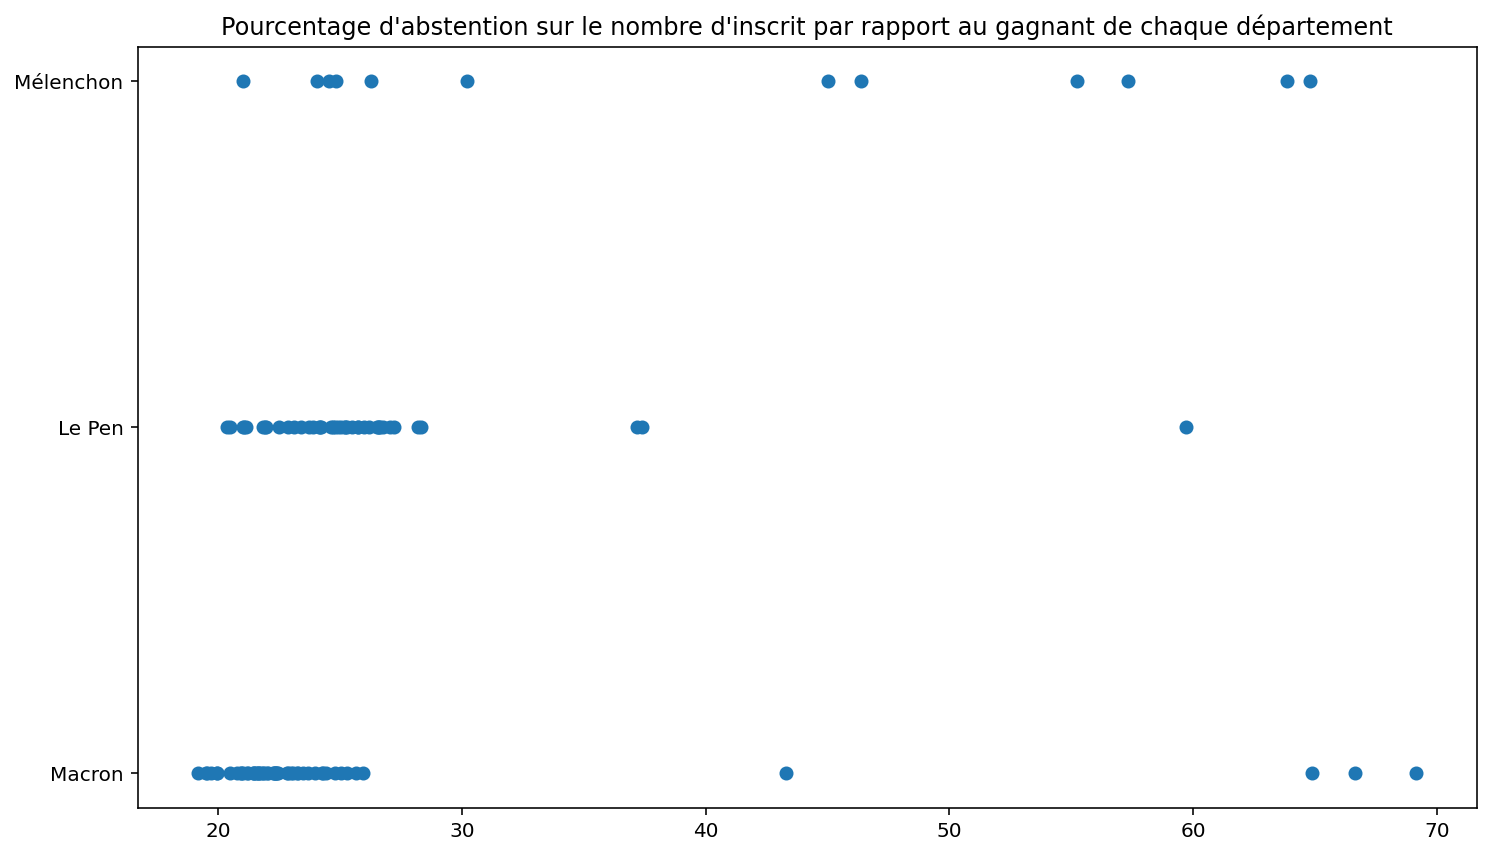

In [14]:
fig, ax = plt.subplots()
plt.scatter(df4['Abstentionpourc'],df4['Gagnant'])
plt.title("Pourcentage d'abstention sur le nombre d'inscrit par rapport au gagnant de chaque département")
ax.set_yticks([3,5,7])
ax.set_yticklabels(['Macron','Le Pen','Mélenchon'])
plt.show()

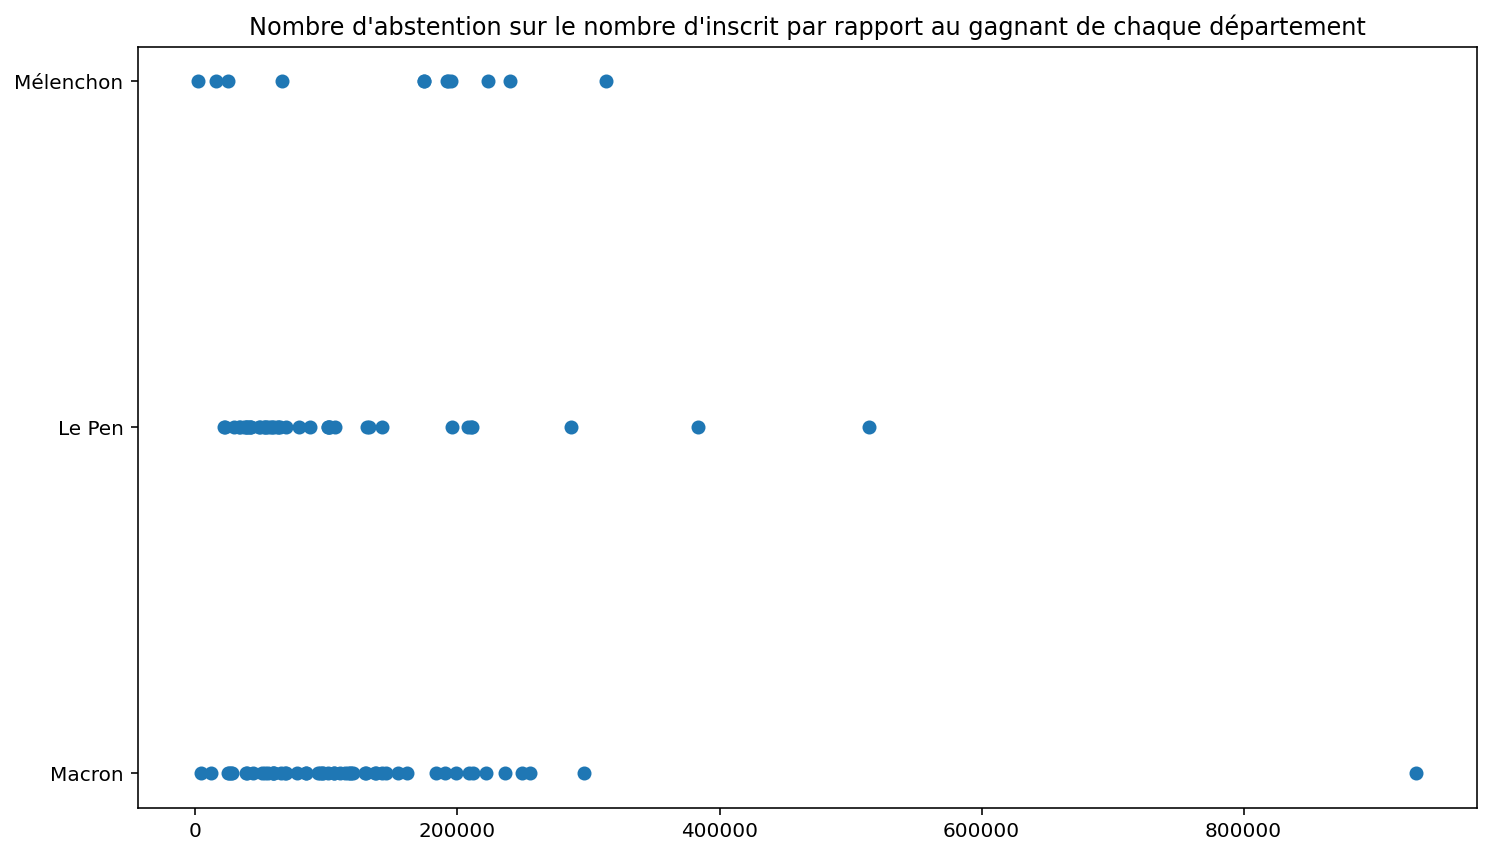

In [15]:
fig, ax = plt.subplots()
ax.scatter(df4['Abstentionnb'],df4['Gagnant'])
plt.title("Nombre d'abstention sur le nombre d'inscrit par rapport au gagnant de chaque département")
ax.set_yticks([3,5,7])
ax.set_yticklabels(['Macron','Le Pen','Mélenchon'])
plt.show()

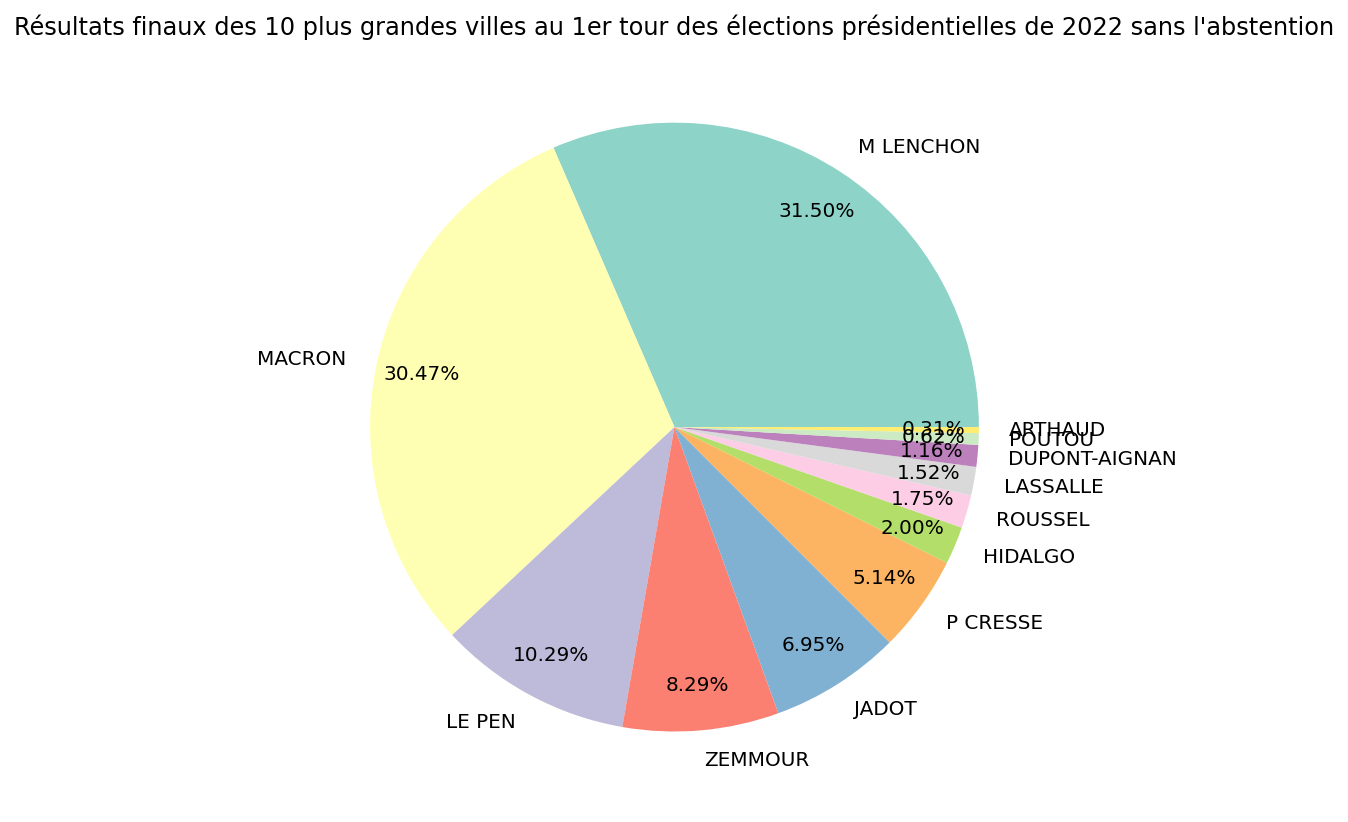

In [16]:
#10 plus grandes villes de France :
#Paris, Marseille, Lyon, Toulouse, Nice, Nantes, Montpellier, Strasbourg, Bordeaux, Lille

#fonction qui en fonction d'un numéro de département et d'un numéro de commune retrouve le nombre de voix de chaque candidats (réécriture de du code pour les pie totaux du départ mais en rajoutant une condition de where) ne bug pas si une ville contient plusieurs circonscription
def uneville(numdep,numvil):
    data={'Nom':[],'Voix':[]}
    #pour la 1er qui a un nom de colonne différent des autres
    data['Nom'].append(df['Nom'][0])  #ajout son nom
    data['Voix'].append(df[(df['Code du département']==numdep) & (df['Code de la commune']==numvil)]['Voix'].sum())  #ajout son nb de voix pour la commune préciser via son numéro de département et numéro de ville
    for i in range(1,12):    #pour tous les autres qui on un nom du style Nom.i
        data['Nom'].append(df['Nom.'+str(i)][0])    #idem
        data['Voix'].append(df[(df['Code du département']==numdep) & (df['Code de la commune']==numvil)]['Voix.'+str(i)].sum())   #idem

    df2 = pd.DataFrame(data)  #transforme le dictio en dataframe
    return df2


#la liste des 10 plus grandes villes de France par leur numéro de département et numéro de ville en les récupérant à la main sur le tableau (par numéro de peur qu'il y ait des bug avec les accents/caractères spéciaux et si jamais il existe deux villes portant le même nom...)
villes=[['75',56],['13',55],['69',123],['31',555],['6',88],['44',109],['34',172],['67',482],['33',63],['59',350]]


#initialisation
tab1=uneville(villes[0][0],villes[0][1])
tab=tab1.copy()
for i in range(1,len(villes)):
    tab2=uneville(villes[i][0],villes[i][1]) 
    tab['Voix']=tab['Voix'].add(tab2['Voix']) #additionne la colonne voix de tab avec celle de tab2 càd le tableau temporaire avec la ville i

#afficher le pie cf avant
tab=tab.sort_values('Voix',ascending=False) 
palette = cm.Set3
plt.pie(tab['Voix'],labels=tab['Nom'],colors=palette.colors,autopct='%1.2f%%',pctdistance=0.85)
plt.title("Résultats finaux des 10 plus grandes villes au 1er tour des élections présidentielles de 2022 sans l'abstention")
plt.show()



In [17]:
uneville('13',55).sort_values('Voix')  #exemple de ce que nous donne la fonction uneville pour Lyon (en ayant trié le tableau en plus)

,Nom,Voix
0,ARTHAUD,1095
10,POUTOU,1968
7,HIDALGO,3847
11,DUPONT-AIGNAN,5081
3,LASSALLE,5687
1,ROUSSEL,7042
9,P CRESSE,10521
8,JADOT,14502
5,ZEMMOUR,38672
4,LE PEN,72772
